<a href="https://colab.research.google.com/github/StinaFia/cv/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision tree and Random forest using Data from Titanic

![titanic](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/266px-RMS_Titanic_3.jpg)

The goal is to train Decision Tree and Random Forest models to predict whether a Titanic passenger is more likely to be a survivor or a victim.

[Dataset description](https://www.openml.org/search?type=data&sort=runs&id=40945&status=active)

In [ ]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

Import the dataset from Seaborn library.

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Check the dataset using info() and check for NaN values.

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Fill the missing values for the desired columns.

In [ ]:
# Pandas fillna function for filling missing data
# Calculate the media of "age" column and fill in the missing values
titanic['age'].fillna(titanic['age'].median(), inplace=True)

# Fill in the missing values in "embarked" column using the mode() function
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<ipython-input-4-4f43bd4312cd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
<ipython-input-4-4f43bd4312cd>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

Convert gender and embarked to numeric values.

[scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [ ]:
# Use LabelEncoder to convert string values numeric
le = LabelEncoder()

titanic['sex'] = le.fit_transform(titanic['sex'])
titanic['embarked'] = le.fit_transform(titanic['embarked'])
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True


Select the features/columns to be used for training and assign the target class to a separate variable.

In [ ]:
# Features are a subset of the necessary columns in the DataFrame.
X_features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
y_features = ['survived']

X = titanic[X_features]
X.head()


,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [ ]:
y = titanic[y_features]
y.head()

,survived
0,0
1,1
2,1
3,1
4,0


Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 7), (268, 7), (623, 1), (268, 1))

# Decision tree

Create a DecisionTreeClassifier and train the model.

In [ ]:
# Test max_depth
# max_depth=3 -> acc = 81%
# max_depth=5 -> acc = 79%
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

Make predictions on the test data and calculate the accuracy using the predictions and the actual results.

In [ ]:
y_pred = clf.predict(X_test)
y_pred[:2]

array([0, 0])

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.8097014925373134


Visualise the Decision Tree.

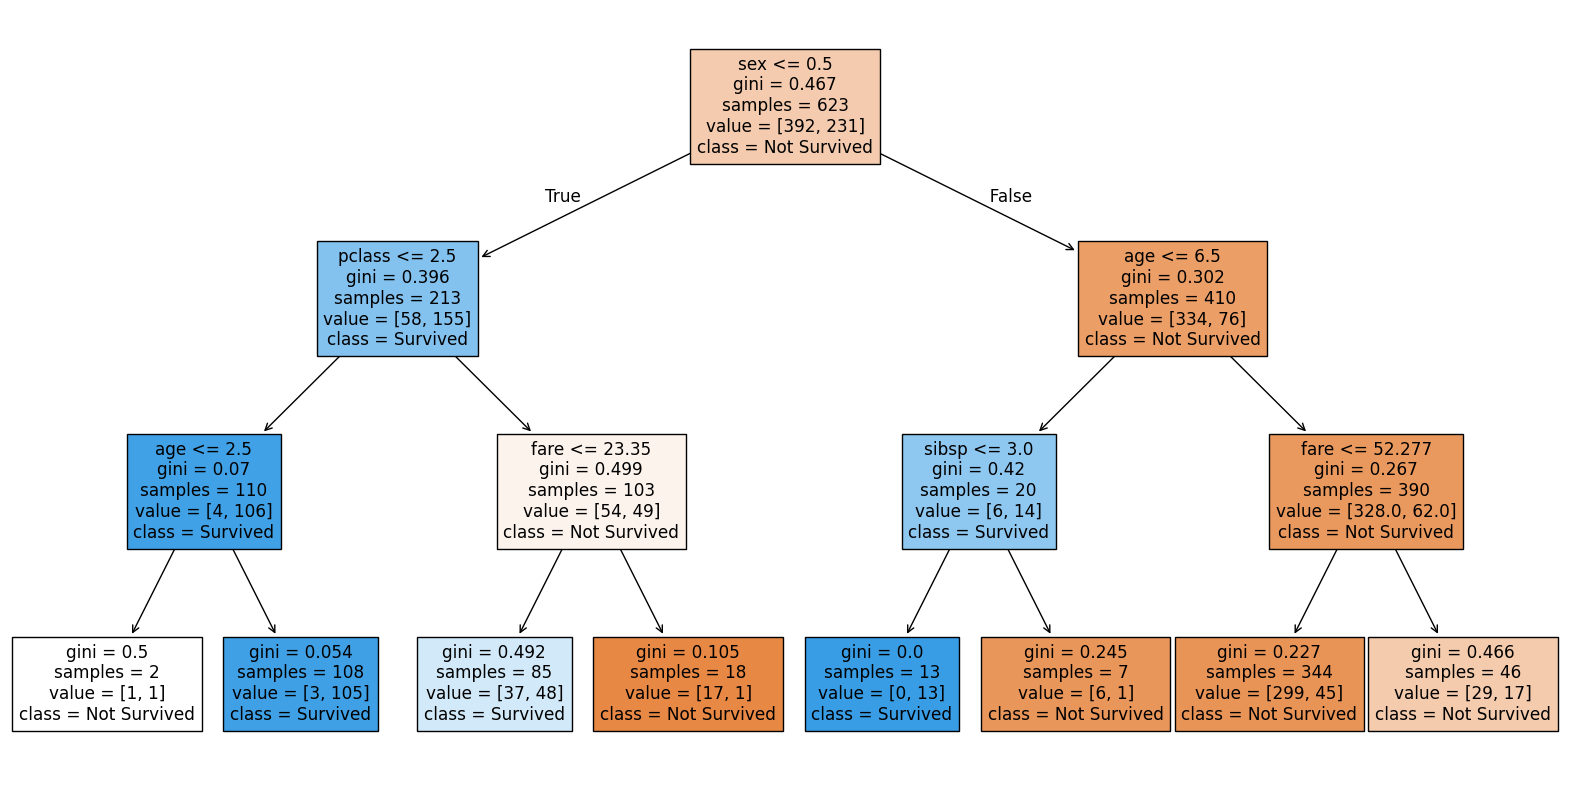

In [ ]:
# plot_tree function
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X_features, class_names=['Not Survived', 'Survived'])
plt.show()

## Random Forest

Create a RandomForestClassifier and train the model.

In [ ]:
rf_clf = RandomForestClassifier(max_depth=20, n_estimators=100)
rf_clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=20)

Make predictions on the test data and calculate the accuracy using the predictions and the actual results.

In [ ]:
# accuracy_score

y_pred = rf_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

Accuracy: 0.7723880597014925


Select one decision tree from the random forest (e.g., the first tree) and visualize the selected decision tree.

<function matplotlib.pyplot.show(close=None, block=None)>

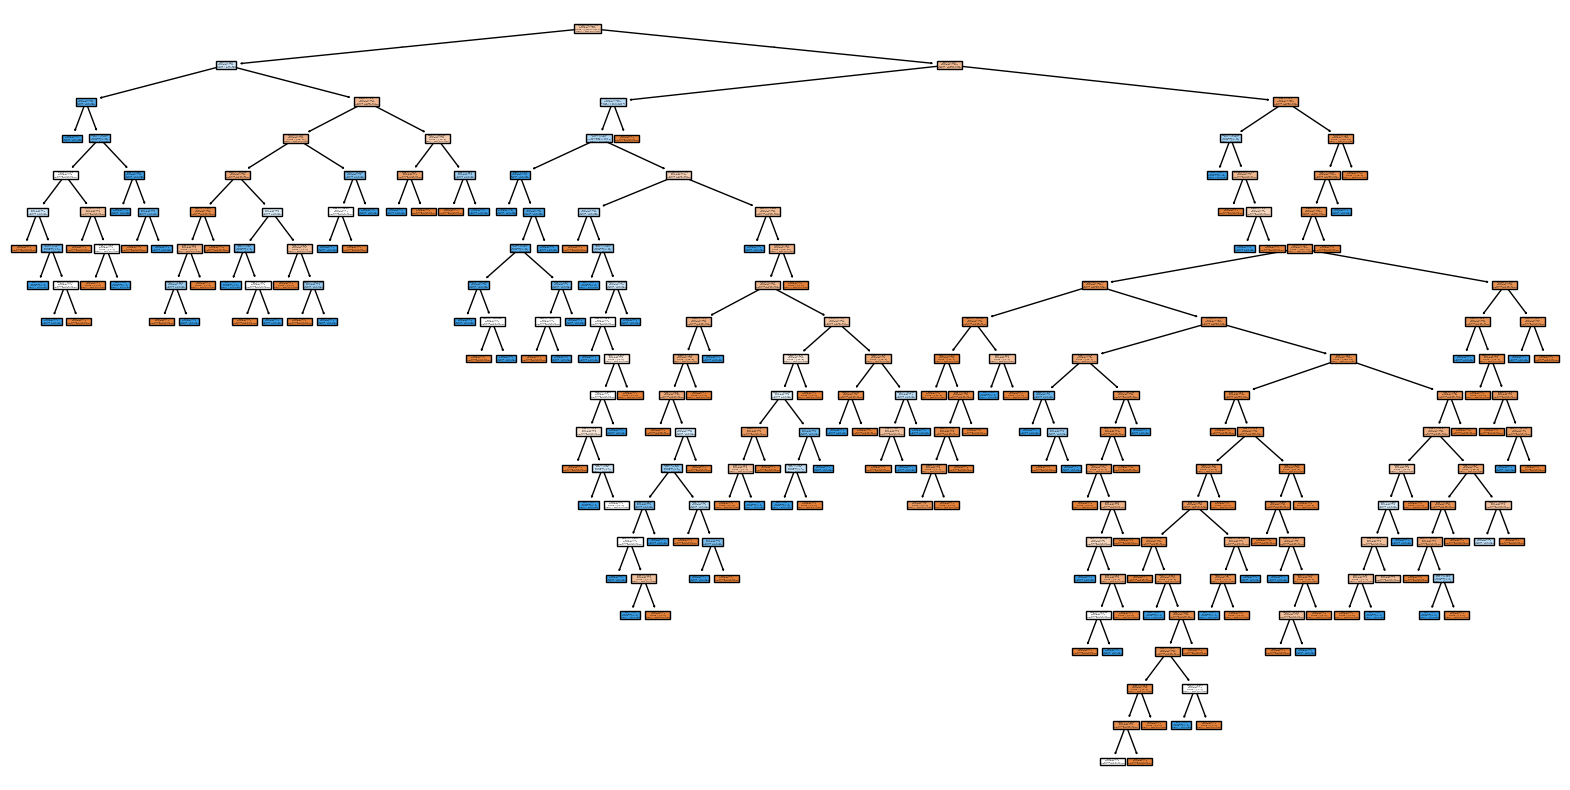

In [ ]:
estimator = rf_clf.estimators_[0]
# -> plot_tree
plt.figure(figsize=(20,10))
plot_tree(estimator, filled=True, feature_names=X_features, class_names=['Not Survived', 'Survived'])
plt.show

Visualise the importance of features in the prediction.

[Feature importances with a forest of trees](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)


"A standard deviation (or σ) is a measure of how dispersed the data is in relation to the mean".
[source](https://www.nlm.nih.gov/oet/ed/stats/02-900.html#:~:text=A%20standard%20deviation%20(or%20%CF%83,data%20are%20more%20spread%20out)

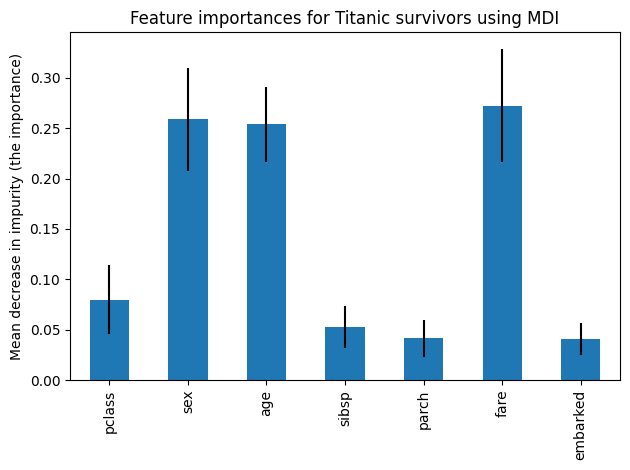

In [ ]:
# RandomForestClassifier includes feature_importances_ attribute
# Use a variable to save the trained model's feature_importances_
importances = rf_clf.feature_importances_

# Pandas series to visualise the data
forest_importances = pd.Series(importances, index=X_features)

# Define the standard deviation
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances for Titanic survivors using MDI")
ax.set_ylabel("Mean decrease in impurity (the importance)")
fig.tight_layout()